In [2]:
from google.colab import drive

In [3]:
import pandas as pd

In [4]:
# Load the dataset
file_path = '/content/drive/MyDrive/6. Week 6 - EDA/(To Solve) Superstore Sales Dataset/train.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [5]:
print(df.shape)

(9800, 18)


In [6]:
print(df.info)

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [7]:
# Check for missing values
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [8]:
# Handle missing values (example: fill with median or drop)
# As the values that are missing are postal codes we are going to drop those
# rows
df = df.dropna()

In [9]:
# Recheck for missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [10]:
print(df.info)

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [11]:
print(df.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [12]:
# Display descriptive statistics
print(df.describe())

            Row ID   Postal Code         Sales
count  9789.000000   9789.000000   9789.000000
mean   4896.705588  55273.322403    230.116193
std    2827.486899  32041.223413    625.302079
min       1.000000   1040.000000      0.444000
25%    2449.000000  23223.000000     17.248000
50%    4896.000000  58103.000000     54.384000
75%    7344.000000  90008.000000    210.392000
max    9800.000000  99301.000000  22638.480000


**#UNIVARIATE ANALYSIS**

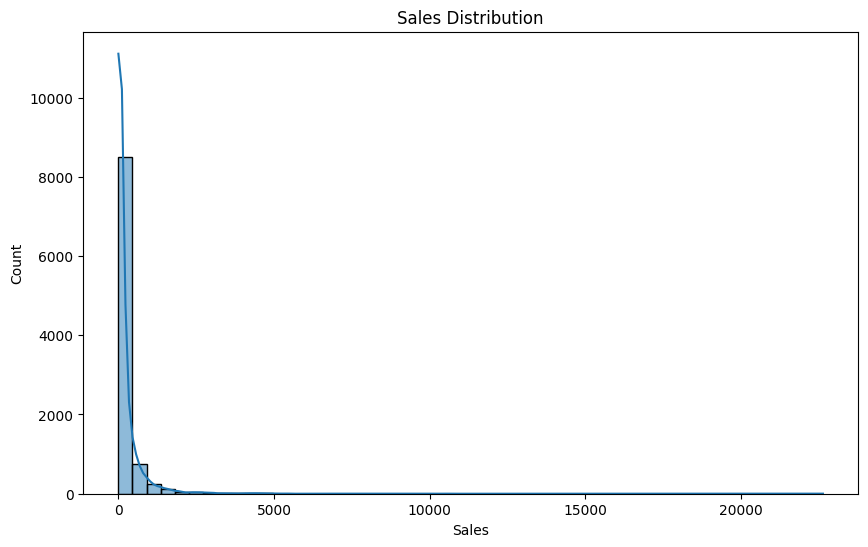

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.xlabel('Sales')
plt.title('Sales Distribution')
plt.show()

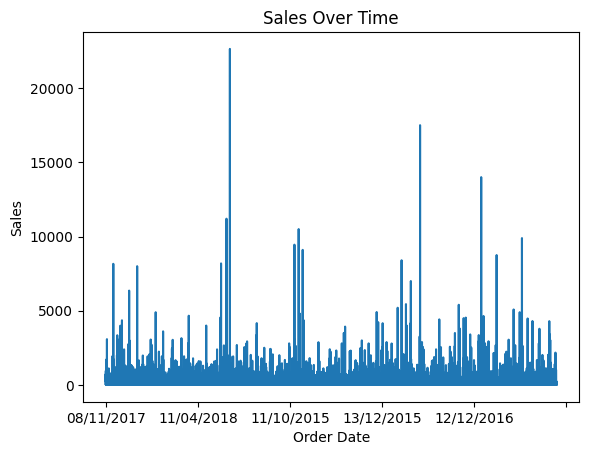

In [14]:
# Plot time series of sales
df.set_index('Order Date')['Sales'].plot()
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.show()

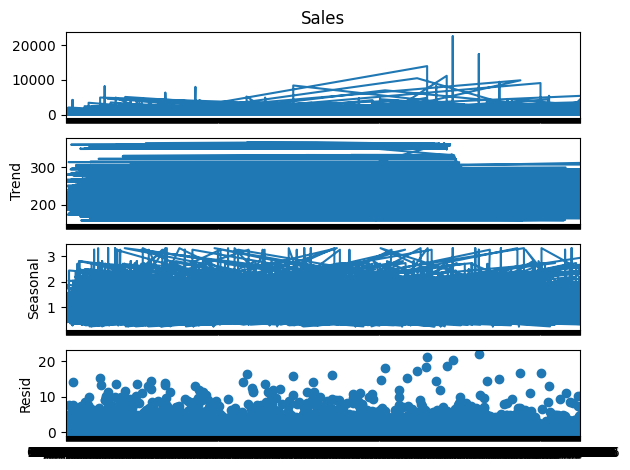

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df.set_index('Order Date')['Sales'], model='multiplicative', period=365)
result.plot()
plt.show()

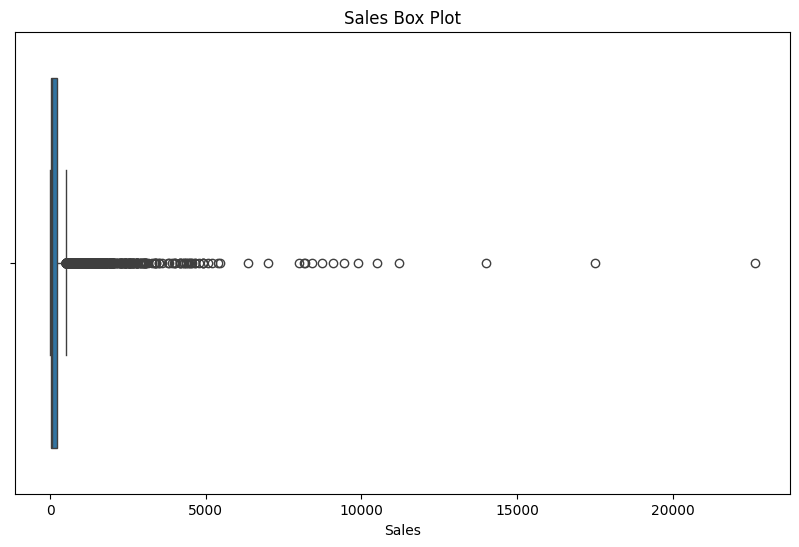

In [16]:
# Plot box plot for Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales', data=df)
plt.title('Sales Box Plot')
plt.show()

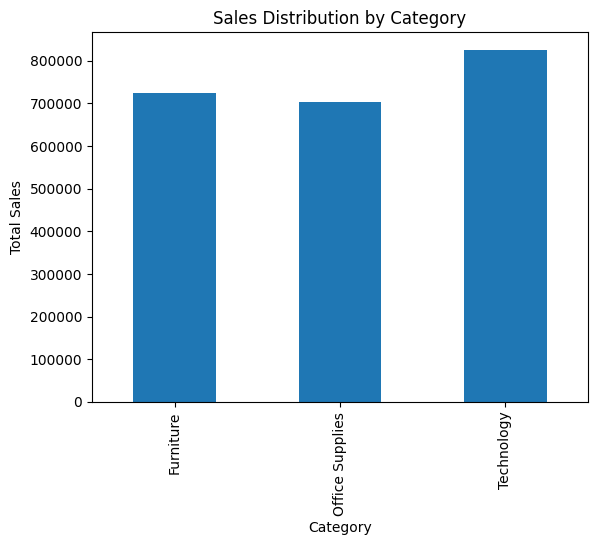

In [17]:
# Plot sales distribution by category
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Category')
plt.show()

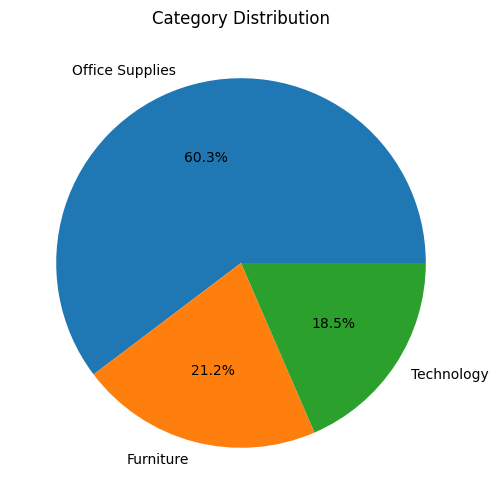

In [18]:
# Plot pie chart for 'Category'
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

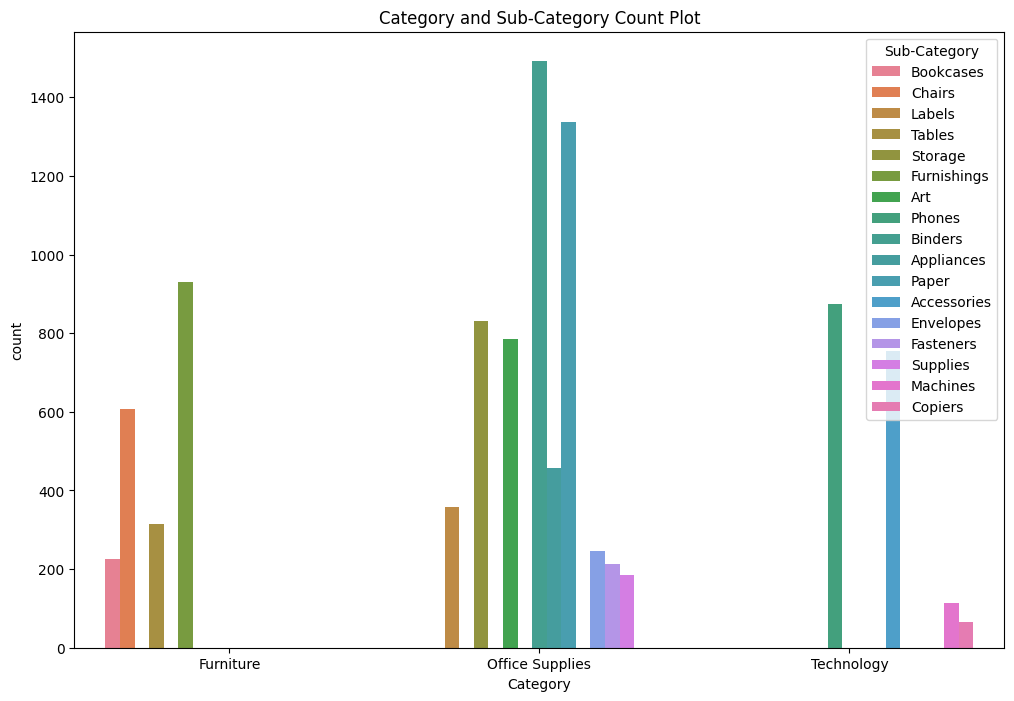

In [19]:
# Plot bar chart with hue for 'Category' and 'Sub-Category'
plt.figure(figsize=(12, 8))
sns.countplot(x='Category', hue='Sub-Category', data=df)
plt.title('Category and Sub-Category Count Plot')
plt.show()

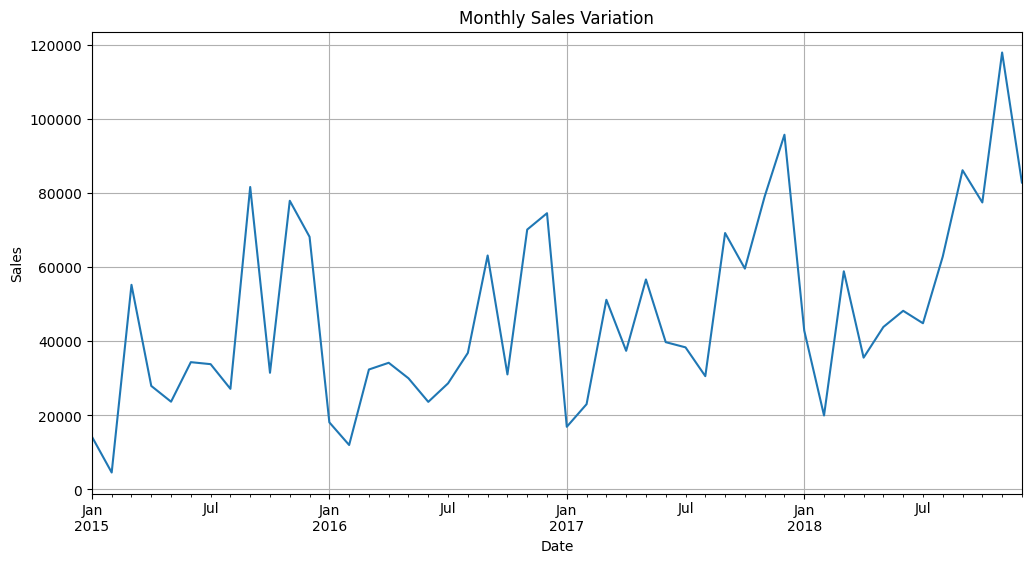

In [20]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample data by month and sum the sales
monthly_sales = df['Sales'].resample('M').sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Variation')
plt.grid(True)
plt.show()

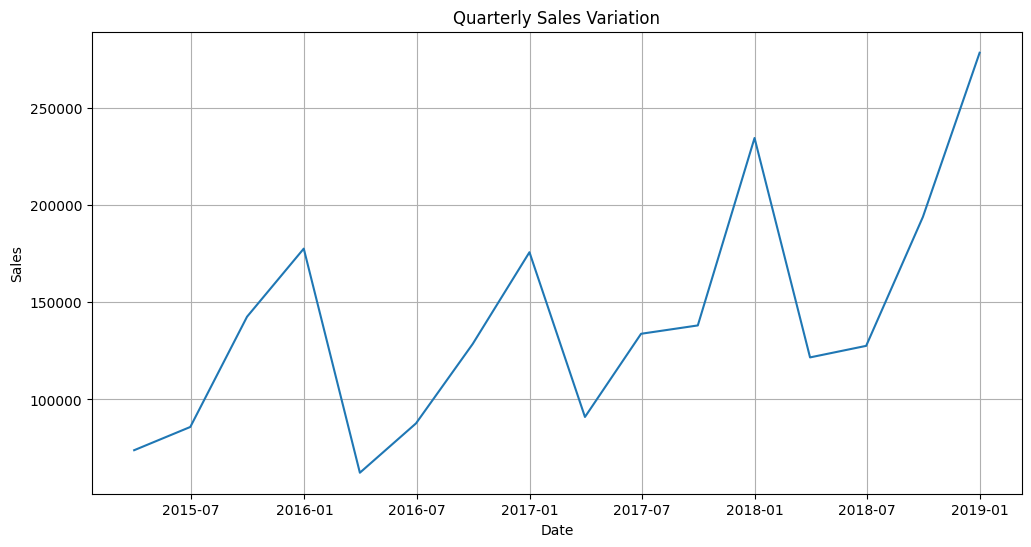

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Resample data by quarter and sum the sales
quarterly_sales = df['Sales'].resample('Q').sum()

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=quarterly_sales.index, y=quarterly_sales.values)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Quarterly Sales Variation')
plt.grid(True)
plt.show()

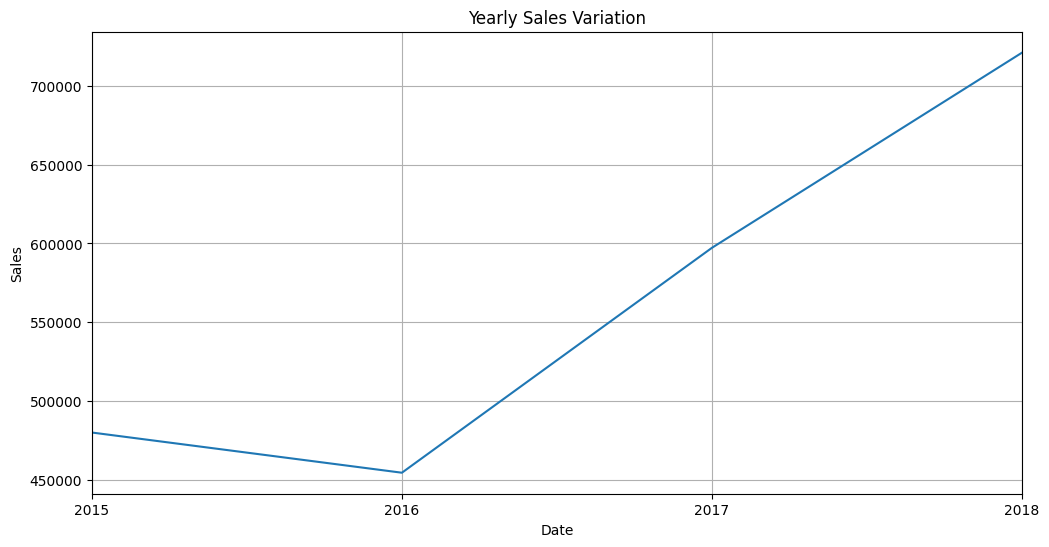

In [22]:
# Resample data by quarter and sum the sales
quarterly_sales = df['Sales'].resample('Y').sum()

# Plotting
plt.figure(figsize=(12, 6))
quarterly_sales.plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Yearly Sales Variation')
plt.grid(True)
plt.show()

**#BIVARIATE ANALYSIS**


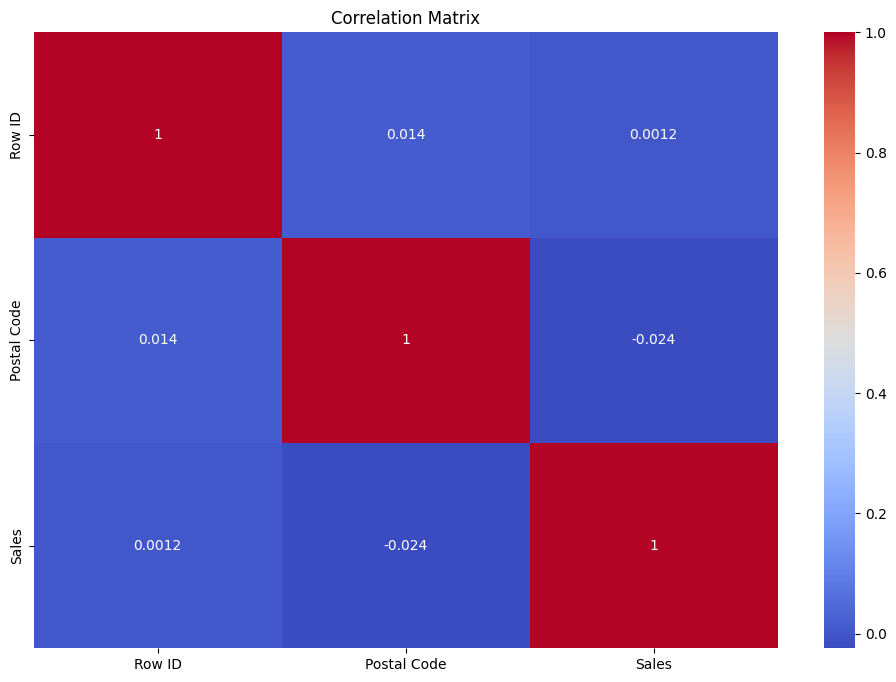

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/6. Week 6 - EDA/(To Solve) Superstore Sales Dataset/train.csv'
df = pd.read_csv(file_path)

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

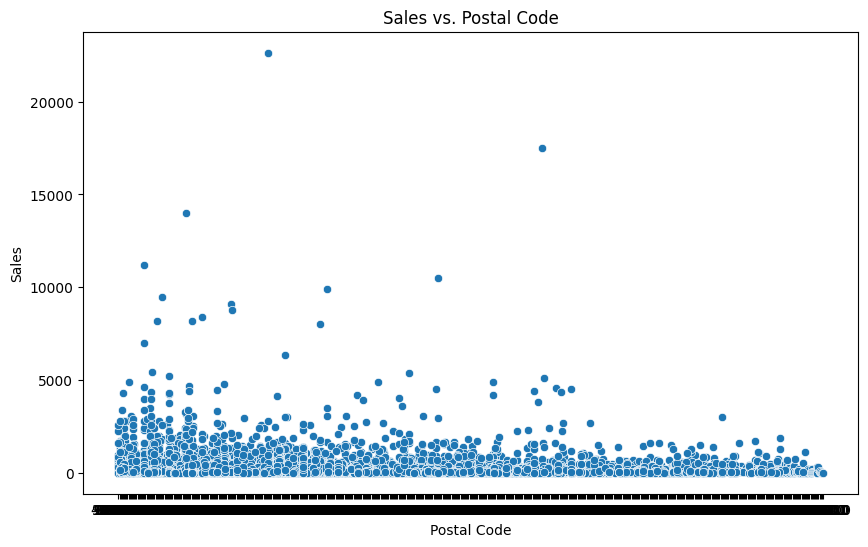

In [24]:
# Convert 'Postal Code' to string (categorical) if it causes issues as numeric
df['Postal Code'] = df['Postal Code'].astype(str)

# Plot scatter plot for 'Sales' vs. 'Postal Code' (if appropriate) or another numeric column
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Postal Code', y='Sales', data=df)
plt.xlabel('Postal Code')
plt.ylabel('Sales')
plt.title('Sales vs. Postal Code')
plt.show()

In [25]:
unique_count = df['City'].nunique()
print(unique_count)

529


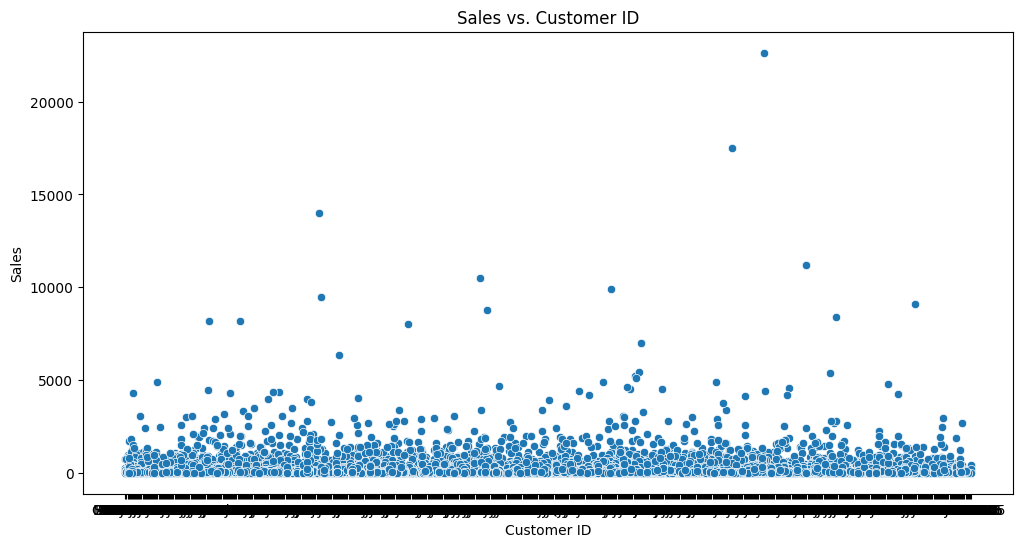

In [26]:
# Scatter plot for 'Sales' vs. another numeric column, if applicable, for example, 'Sales' vs. 'Row ID'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Customer ID', y='Sales', data=df)
plt.xlabel('Customer ID')
plt.ylabel('Sales')
plt.title('Sales vs. Customer ID')
plt.show()

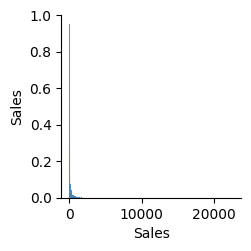

In [27]:
# Plot pair plot for selected numeric columns, example: 'Sales'
sns.pairplot(df[['Sales']])
plt.show()

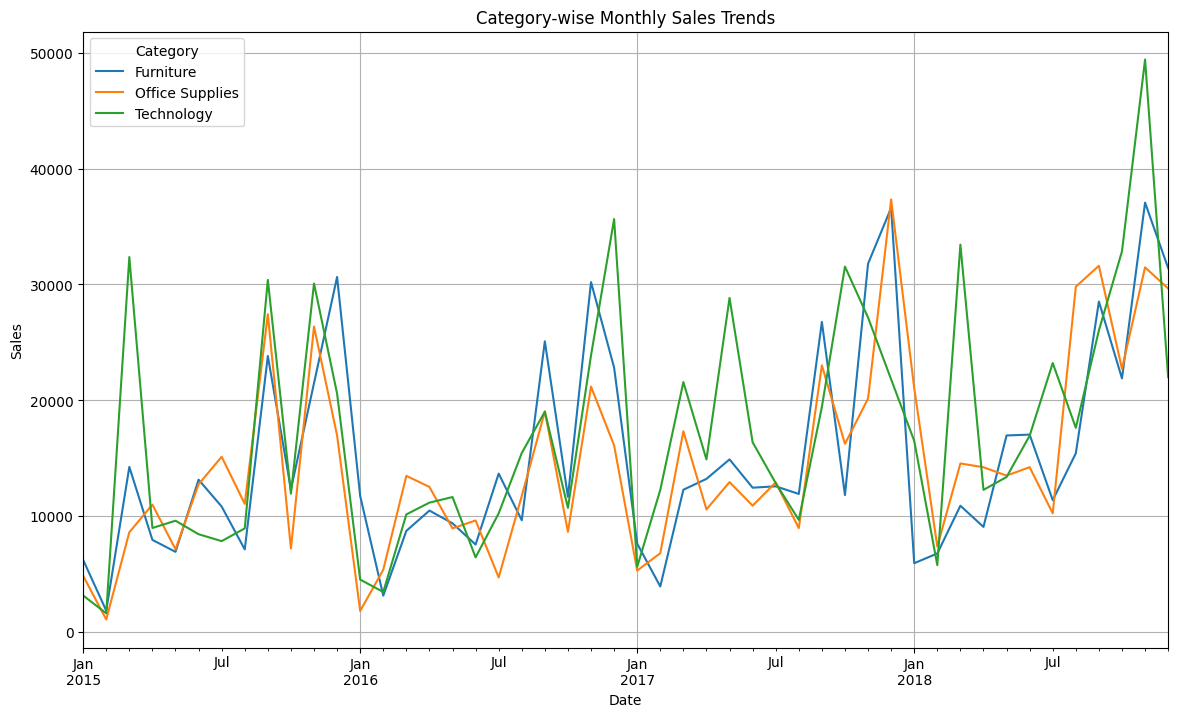

In [28]:
# Resample by month and sum the sales for each category
category_sales = df.groupby('Category')['Sales'].resample('M').sum().unstack(0)

# Plotting
category_sales.plot(figsize=(14, 8))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Category-wise Monthly Sales Trends')
plt.legend(title='Category')
plt.grid(True)
plt.show()

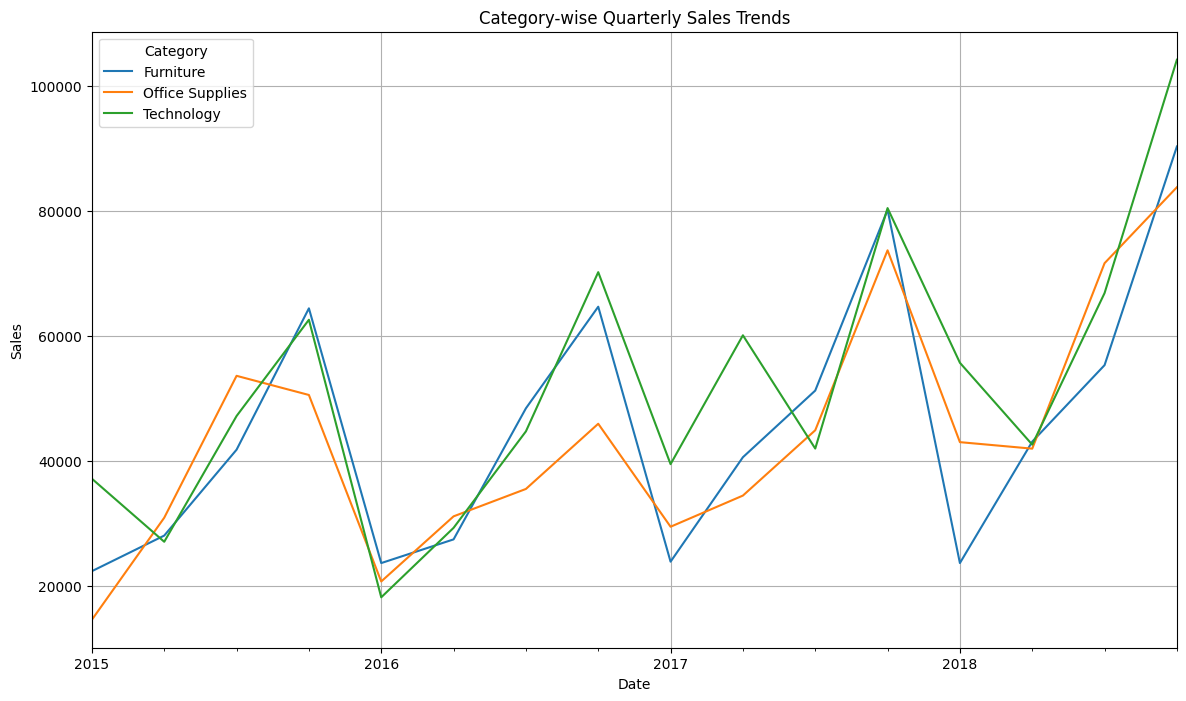

In [29]:
# Resample by month and sum the sales for each category
category_sales = df.groupby('Category')['Sales'].resample('Q').sum().unstack(0)

# Plotting
category_sales.plot(figsize=(14, 8))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Category-wise Quarterly Sales Trends')
plt.legend(title='Category')
plt.grid(True)
plt.show()


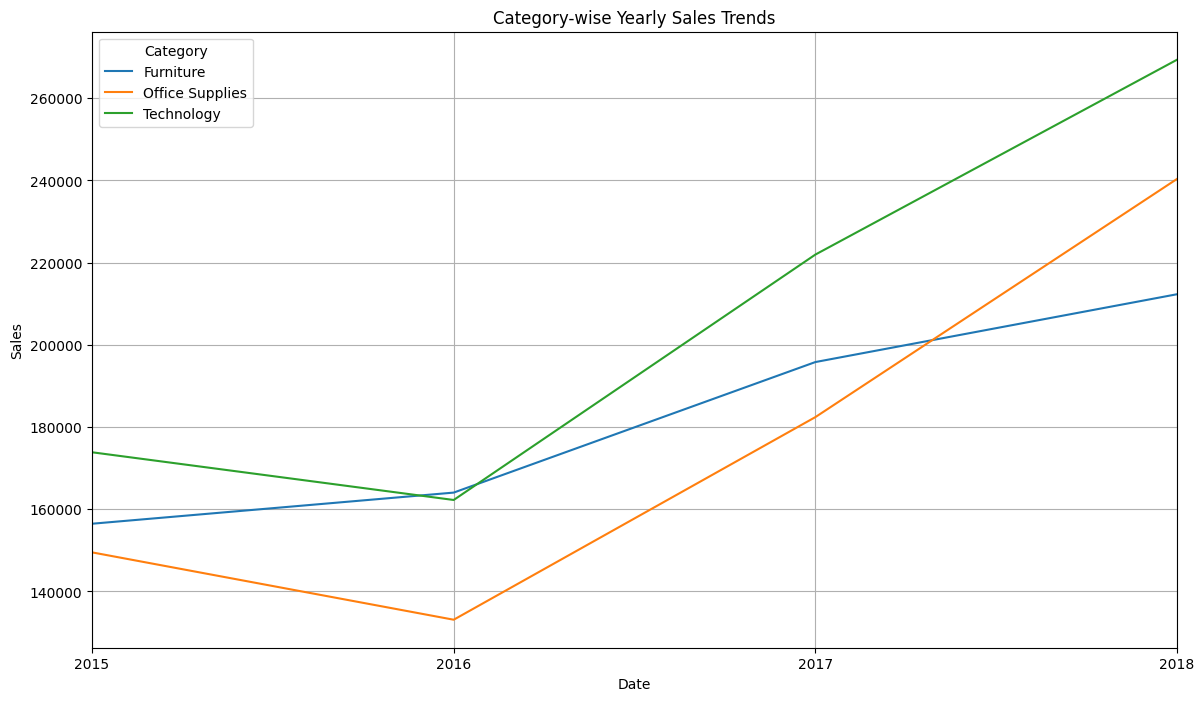

In [30]:
# Resample by month and sum the sales for each category
category_sales = df.groupby('Category')['Sales'].resample('A').sum().unstack(0)

# Plotting
category_sales.plot(figsize=(14, 8))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Category-wise Yearly Sales Trends')
plt.legend(title='Category')
plt.grid(True)
plt.show()


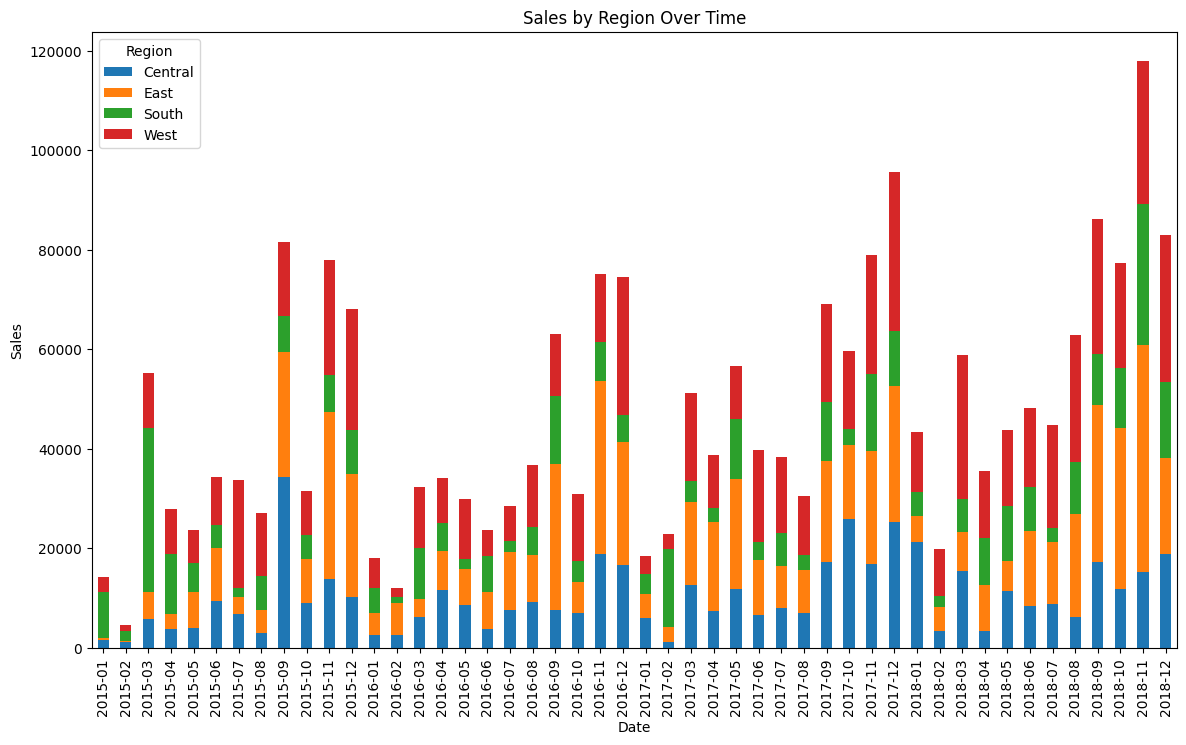

In [31]:
# Group by 'Region' and resample sales by month
region_sales = df.groupby(['Region', df.index.to_period('M')])['Sales'].sum().unstack('Region')

# Plot stacked bar chart
region_sales.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Region Over Time')
plt.legend(title='Region')
plt.show()

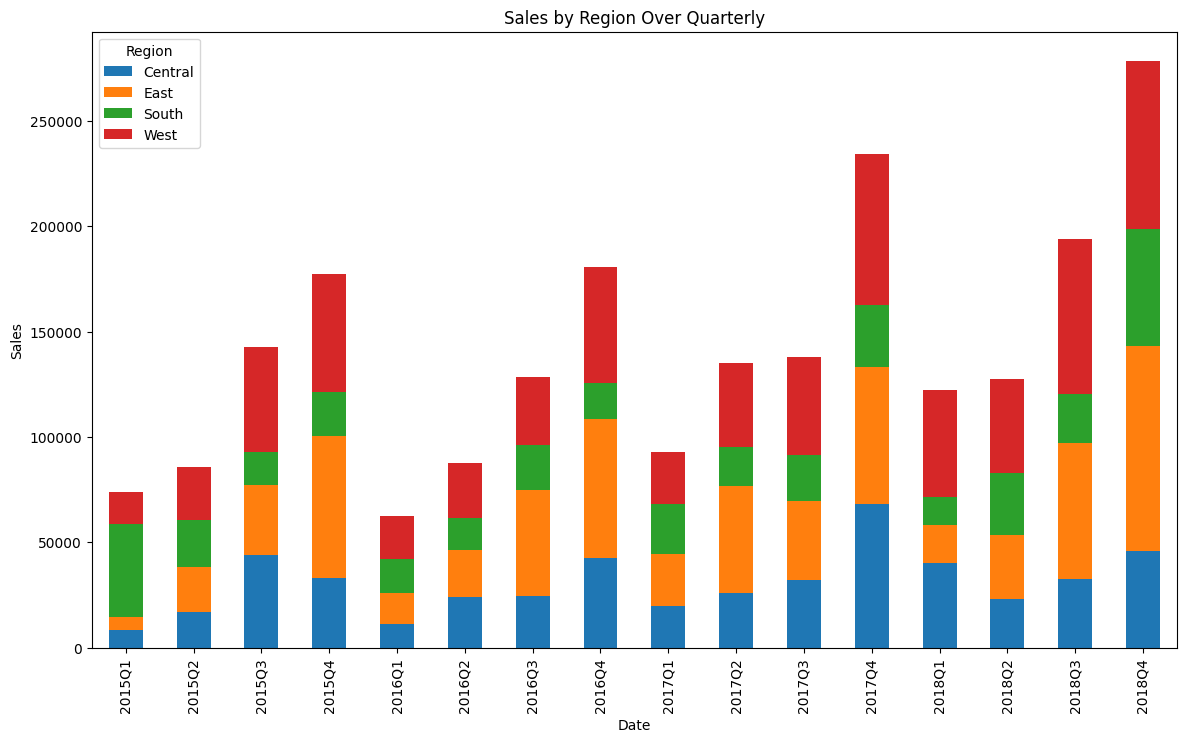

In [32]:
# Group by 'Region' and resample sales by month
region_sales = df.groupby(['Region', df.index.to_period('Q')])['Sales'].sum().unstack('Region')

# Plot stacked bar chart
region_sales.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Region Over Quarterly')
plt.legend(title='Region')
plt.show()


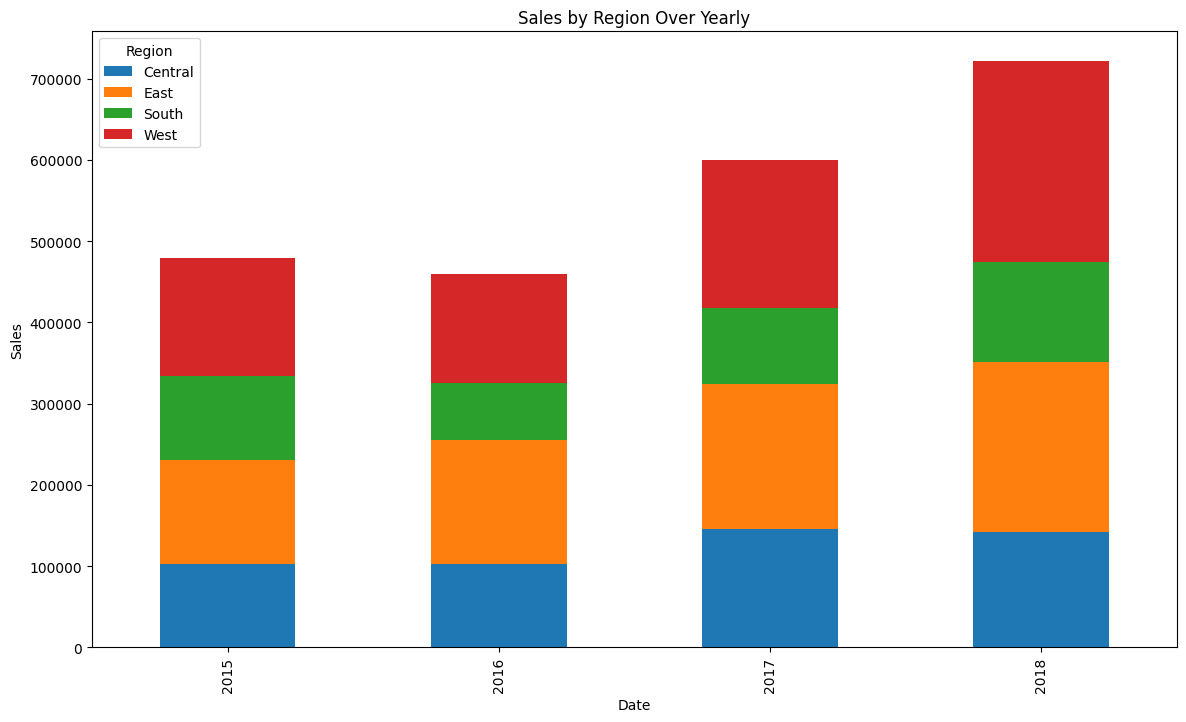

In [33]:
# Group by 'Region' and resample sales by month
region_sales = df.groupby(['Region', df.index.to_period('Y')])['Sales'].sum().unstack('Region')

# Plot stacked bar chart
region_sales.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Region Over Yearly')
plt.legend(title='Region')
plt.show()


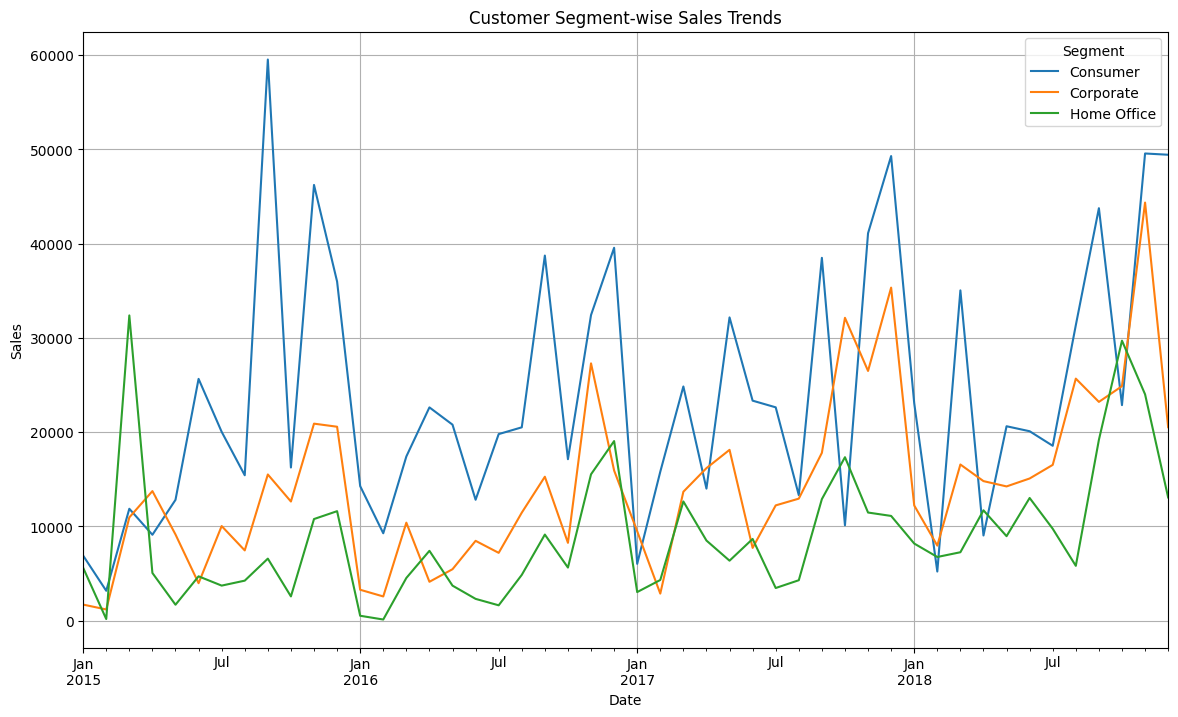

In [34]:
# Group by 'Segment' and resample sales by month
segment_sales = df.groupby(['Segment', df.index.to_period('M')])['Sales'].sum().unstack('Segment')

# Plotting
segment_sales.plot(figsize=(14, 8))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Customer Segment-wise Sales Trends')
plt.legend(title='Segment')
plt.grid(True)
plt.show()

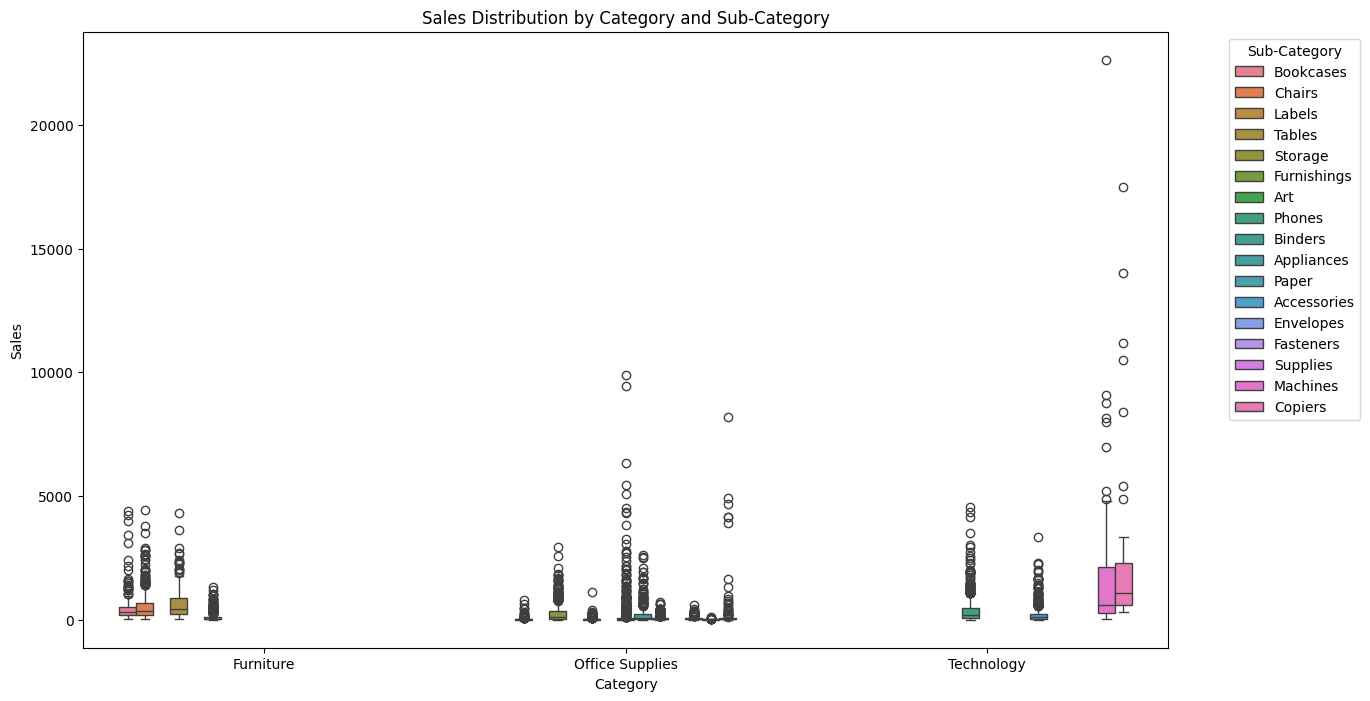

In [35]:
# Box plot for 'Sales' with 'Category' and 'Sub-Category' as hue
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Sales', hue='Sub-Category', data=df)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales Distribution by Category and Sub-Category')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**INDIAN CARS DATA**

In [36]:
# Load the dataset
file_path = '/content/drive/MyDrive/6. Week 6 - EDA/Indian Cars (To solve)/cars_ds_final.csv'
cars_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
cars_df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Check for missing values
missing_values = cars_df.isnull().sum()

# Display columns with missing values and their count
missing_values = missing_values[missing_values > 0]
missing_values

Make                     75
Displacement             12
Cylinders                66
Valves_Per_Cylinder     102
Drivetrain                7
                       ... 
USB_Ports              1247
Heads-Up_Display       1225
Welcome_Lights         1207
Battery                1263
Electric_Range         1259
Length: 134, dtype: int64

In [38]:
# Remove currency symbols and commas from the 'Ex-Showroom_Price' column and convert it to numeric
cars_df['Ex-Showroom_Price'] = cars_df['Ex-Showroom_Price'].str.replace('Rs. ', '').str.replace(',', '').astype(float)

In [39]:
# Convert 'Displacement' to numeric after removing 'cc'
cars_df['Displacement'] = cars_df['Displacement'].str.replace(' cc', '').astype(float)

In [40]:
# Converting 'Cylinders', 'Valves_Per_Cylinder' to numeric
cars_df['Cylinders'] = cars_df['Cylinders'].astype(float)
cars_df['Valves_Per_Cylinder'] = cars_df['Valves_Per_Cylinder'].astype(float)

In [41]:
# Handle missing values: Drop rows with missing 'Make', 'Model', 'Ex-Showroom_Price', 'Displacement', 'Cylinders'
cars_df = cars_df.dropna(subset=['Make', 'Model', 'Ex-Showroom_Price', 'Displacement', 'Cylinders'])

# Fill remaining missing values with 0 for feature columns
cars_df = cars_df.fillna(0)

# Check the cleaned dataset
cars_df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,0,0,0,0,0,0.0,0,0,0,0
1,1,Tata,Nano Genx,Xe,236447.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,0,0,0,0,0,0.0,0,0,0,0
2,2,Tata,Nano Genx,Emax Xm,296661.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,0,0,0,0,0,0.0,0,0,0,0
3,3,Tata,Nano Genx,Xta,334768.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,0,0,0,0,0,0.0,0,0,0,0
4,4,Tata,Nano Genx,Xm,272223.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,0,0,0,0,0,0.0,0,0,0,0


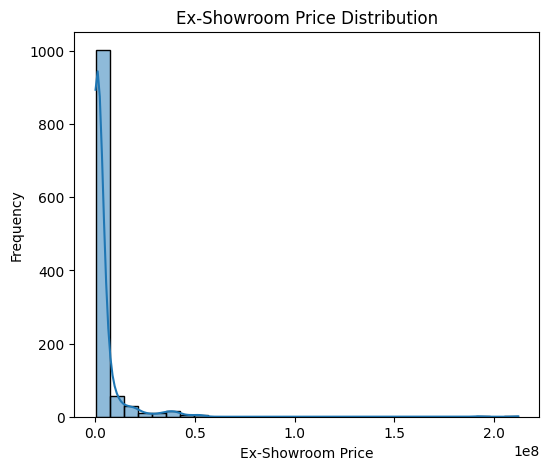

In [42]:
# Calculate basic descriptive statistics
desc_stats = cars_df.describe()

#Histogram for Ex-Showroom Price
plt.figure(figsize=(6, 5))
sns.histplot(cars_df['Ex-Showroom_Price'], bins=30, kde=True)
plt.title('Ex-Showroom Price Distribution')
plt.xlabel('Ex-Showroom Price')
plt.ylabel('Frequency')
plt.show()

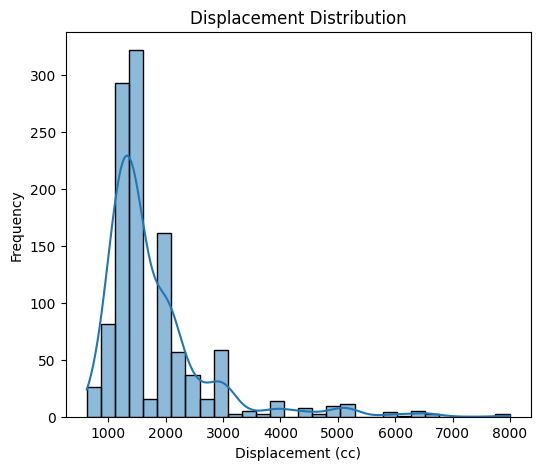

In [43]:
#Histogram for Displacement
plt.figure(figsize=(6, 5))
sns.histplot(cars_df['Displacement'], bins=30, kde=True)
plt.title('Displacement Distribution')
plt.xlabel('Displacement (cc)')
plt.ylabel('Frequency')
plt.show()

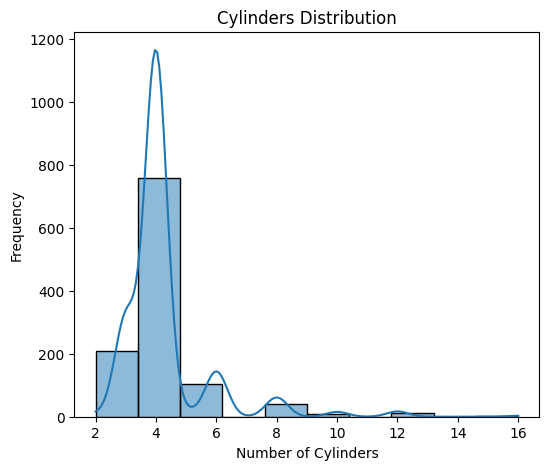

In [44]:
#Histogram for Cylinders
plt.figure(figsize=(6, 5))
sns.histplot(cars_df['Cylinders'], bins=10, kde=True)
plt.title('Cylinders Distribution')
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.show()

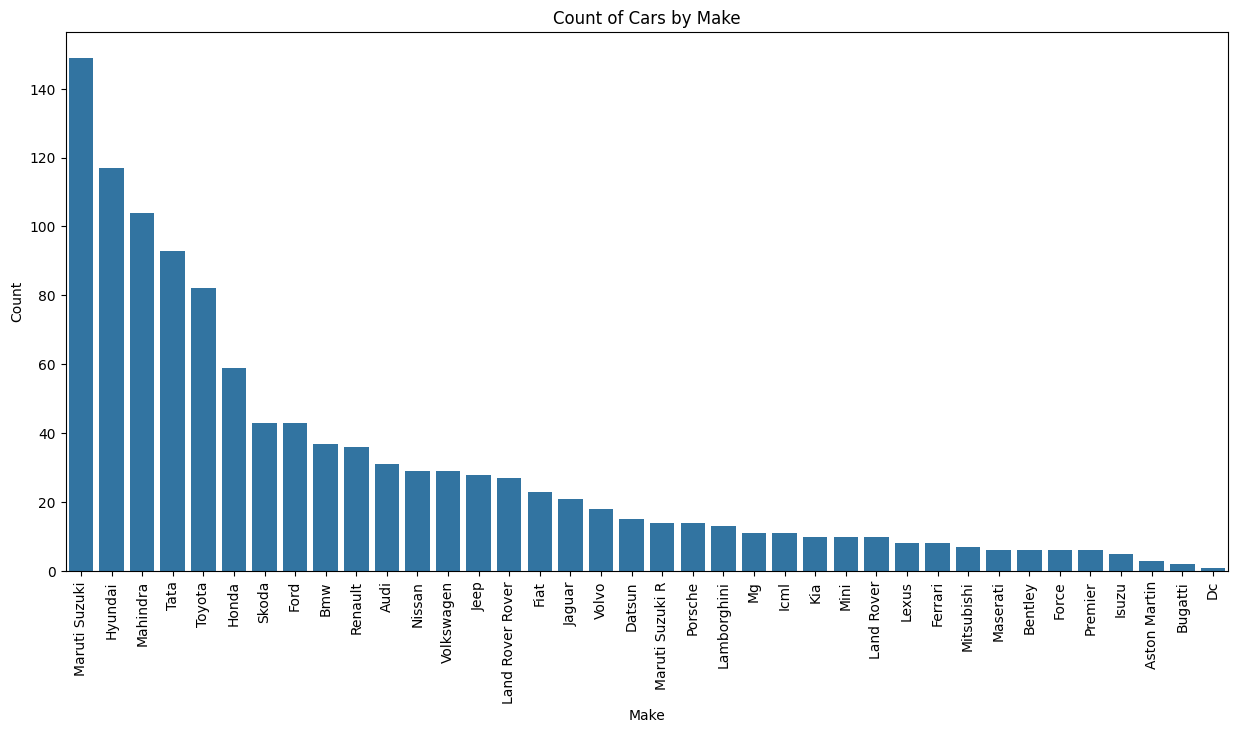

In [45]:
#Bar Chart for Make
plt.figure(figsize=(15, 7))
sns.countplot(data=cars_df, x='Make', order=cars_df['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Cars by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

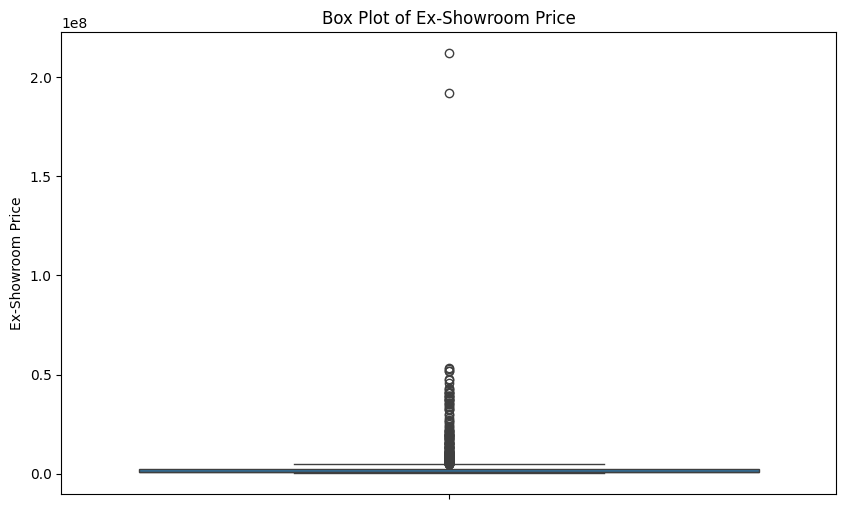

In [46]:
#Box Plot for Ex-Showroom Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=cars_df, y='Ex-Showroom_Price')
plt.title('Box Plot of Ex-Showroom Price')
plt.ylabel('Ex-Showroom Price')
plt.show()

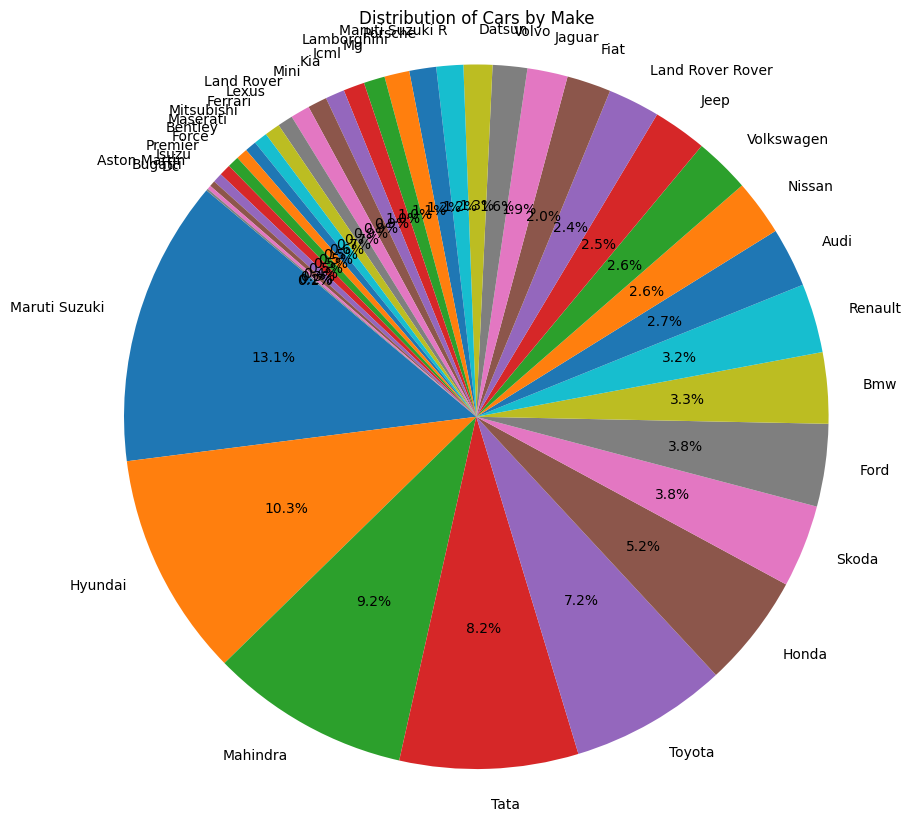

In [47]:
#Pie chart for Make
make_counts = cars_df['Make'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Cars by Make')
plt.show()

Model
Nexon            24
Kuv100 Nxt       22
Xuv500           21
Compass          21
Amaze            20
Creta            18
Innova Crysta    16
Yaris            14
Ciaz             14
Rapid            14
Name: count, dtype: int64


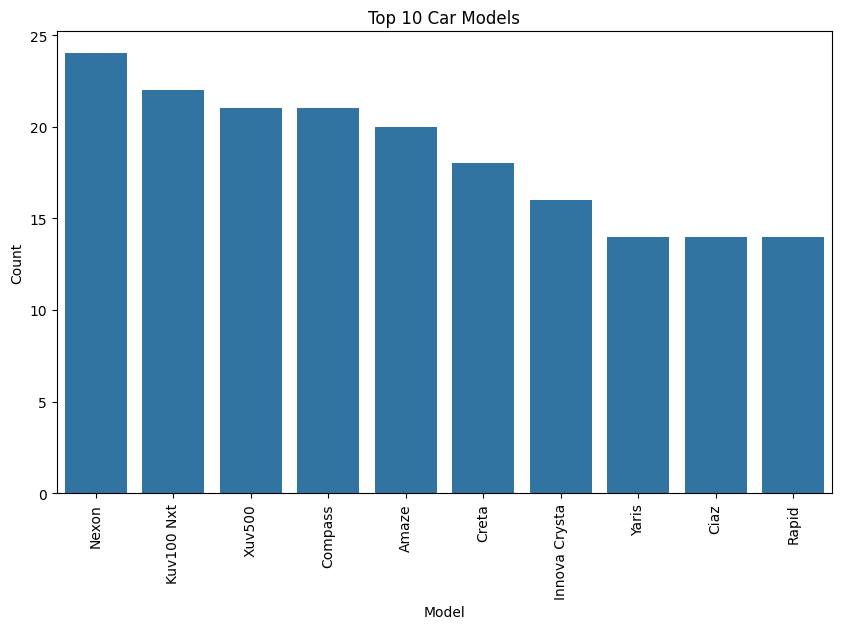

In [48]:
# Assuming 'Model' is the column that contains car models
top_models = cars_df['Model'].value_counts().head(10)
print(top_models)

# Visualizing top car models
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.index, y=top_models.values)
plt.xticks(rotation=90)
plt.title('Top 10 Car Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [49]:
# Finding the cheapest and most expensive car
cheapest_car = cars_df.loc[cars_df['Ex-Showroom_Price'].idxmin()]
most_expensive_car = cars_df.loc[cars_df['Ex-Showroom_Price'].idxmax()]

print("Cheapest Car:")
print(cheapest_car)
print("\nMost Expensive Car:")
print(most_expensive_car)

Cheapest Car:
Unnamed: 0                   1
Make                      Tata
Model                Nano Genx
Variant                     Xe
Ex-Showroom_Price     236447.0
                       ...    
USB_Ports                  0.0
Heads-Up_Display             0
Welcome_Lights               0
Battery                      0
Electric_Range               0
Name: 1, Length: 141, dtype: object

Most Expensive Car:
Unnamed: 0                   356
Make                     Bugatti
Model                     Chiron
Variant                    Sport
Ex-Showroom_Price    212155397.0
                        ...     
USB_Ports                    1.0
Heads-Up_Display             Yes
Welcome_Lights               Yes
Battery                        0
Electric_Range                 0
Name: 356, Length: 141, dtype: object


Fuel_Type
Petrol          578
Diesel          522
CNG              15
Hybrid           15
CNG + Petrol      5
Name: count, dtype: int64


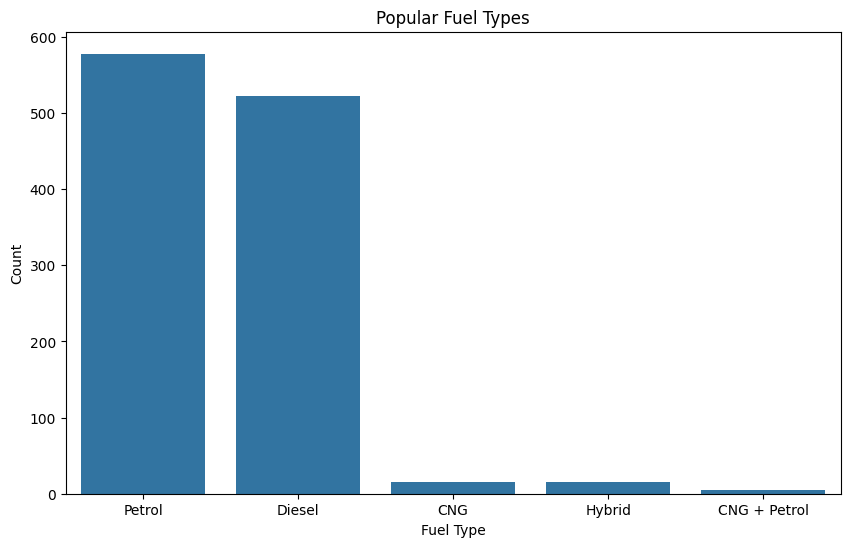

In [50]:
# Counting fuel types
fuel_type_counts = cars_df['Fuel_Type'].value_counts()
print(fuel_type_counts)

# Visualizing popular fuel types
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values)
plt.title('Popular Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

Seating_Capacity
5.0     817
7.0     164
4.0      53
2.0      36
6.0      23
9.0      19
8.0      17
0.0       5
16.0      1
Name: count, dtype: int64


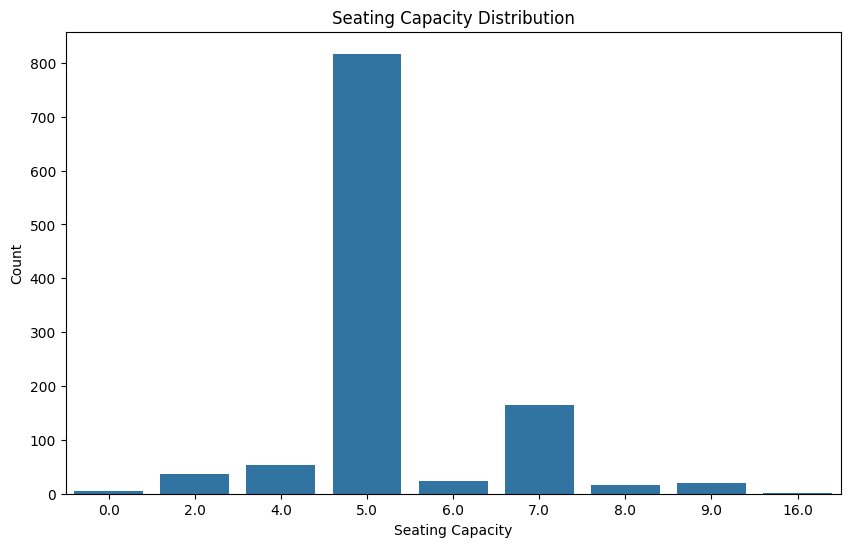

In [51]:
# Counting seating capacity
seating_capacity_counts = cars_df['Seating_Capacity'].value_counts()
print(seating_capacity_counts)

# Visualizing seating capacity
plt.figure(figsize=(10, 6))
sns.barplot(x=seating_capacity_counts.index, y=seating_capacity_counts.values)
plt.title('Seating Capacity Distribution')
plt.xlabel('Seating Capacity')
plt.ylabel('Count')
plt.show()

Airbags
Driver frontal airbag, Front passenger frontal airbag                                                                                                                                                                                                          537
0                                                                                                                                                                                                                                                              118
Driver frontal airbag                                                                                                                                                                                                                                           60
Front passenger frontal airbag, Driver frontal airbag                                                                                                                                                                  

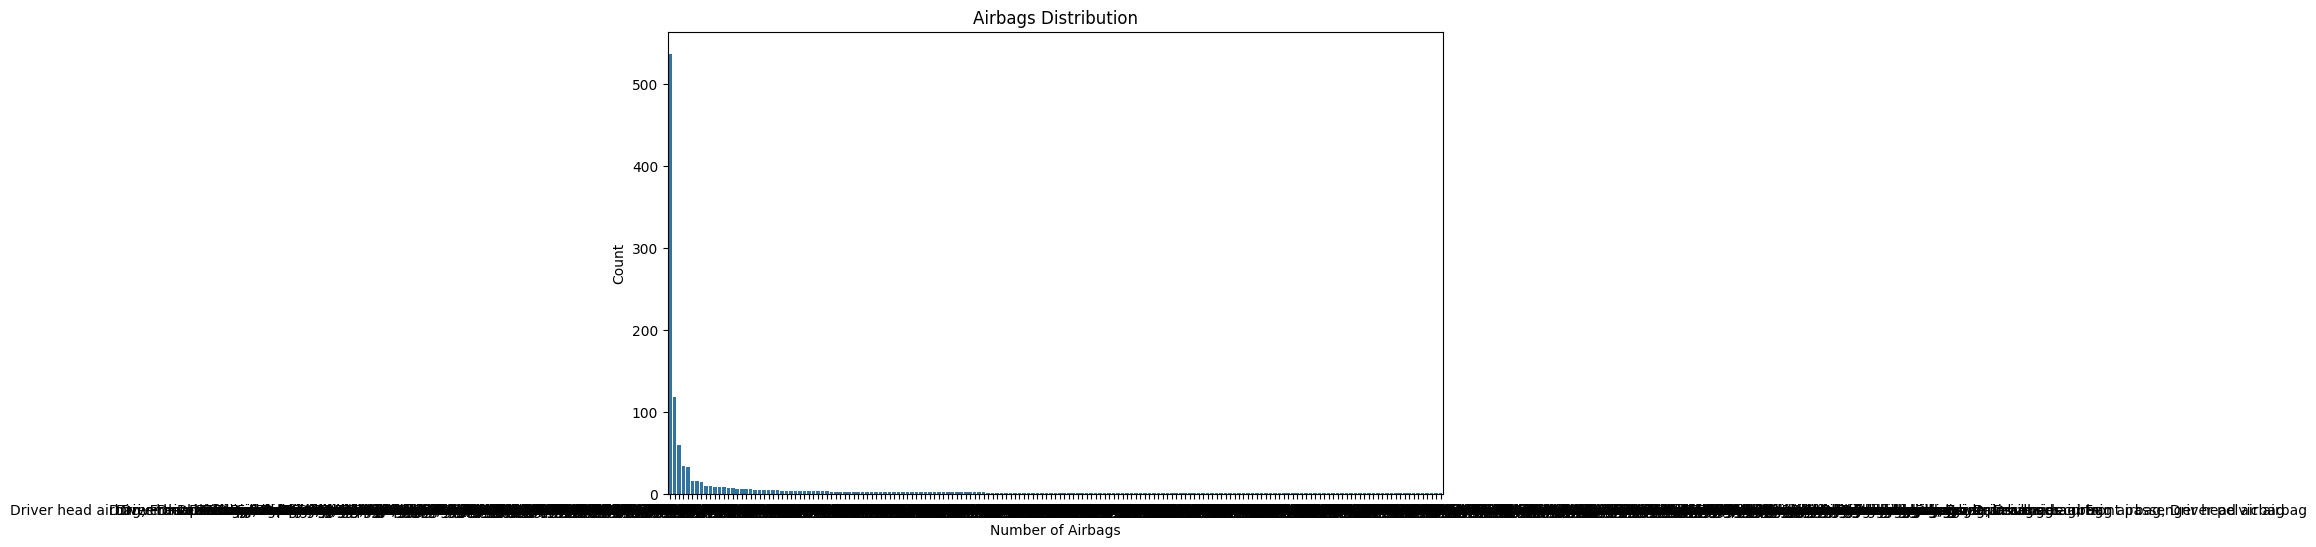

In [52]:
# Counting airbags
airbags_counts = cars_df['Airbags'].value_counts()
print(airbags_counts)

# Visualizing airbags
plt.figure(figsize=(10, 6))
sns.barplot(x=airbags_counts.index, y=airbags_counts.values)
plt.title('Airbags Distribution')
plt.xlabel('Number of Airbags')
plt.ylabel('Count')
plt.show()

Body_Type
SUV                    393
Hatchback              310
Sedan                  285
MUV                     37
Coupe                   33
MPV                     25
Crossover               18
Convertible             14
0                        3
Sports                   3
Pick-up                  3
Sports, Convertible      2
Sedan, Coupe             2
Crossover, SUV           2
SUV, Crossover           2
Sports, Hatchback        1
Sedan, Crossover         1
Coupe, Convertible       1
Name: count, dtype: int64


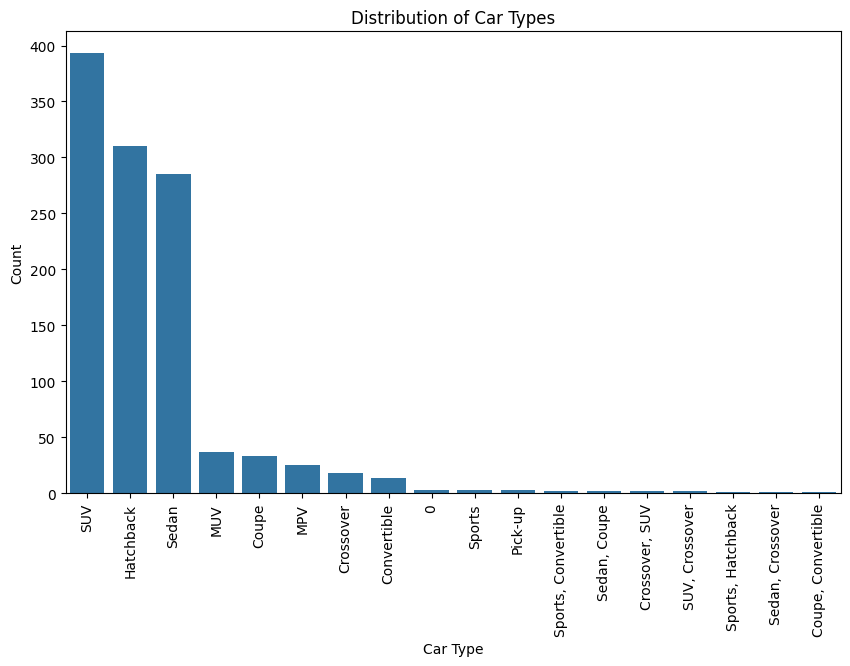

In [53]:
# Assuming 'Body_Type' is the column that contains car types (e.g., Sedan, SUV)
car_type_counts = cars_df['Body_Type'].value_counts()
print(car_type_counts)

# Visualizing car types
plt.figure(figsize=(10, 6))
sns.barplot(x=car_type_counts.index, y=car_type_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Car Types')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.show()